<h1>ACTIVITY 3 - PHILIPPINES DENGUE DATA ANALYTICS PROJECT</h1>
<hr>
<h2>Analyst : Jeremy Bryan T. Villanueva</h2>

<h2>Libraries</h2>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h2>Converting Datasets into DataFrame</h2>

In [2]:
dengue = pd.read_csv('dataset\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h2>DataFrame Info</h2>

In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h2>DataFrame Basic Descriptive Statistics</h2>

In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


<h2>Checking Null Values</h2>

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>Checking Column Data Types</h2>

In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [10]:
# Convert to string (object)
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

<h2>Exploratory Data Analytics</h2>

<h3>Question 1:</h3>
<h4>Which regions have the highest fatality rates (deaths per 1000 cases)?</h4>

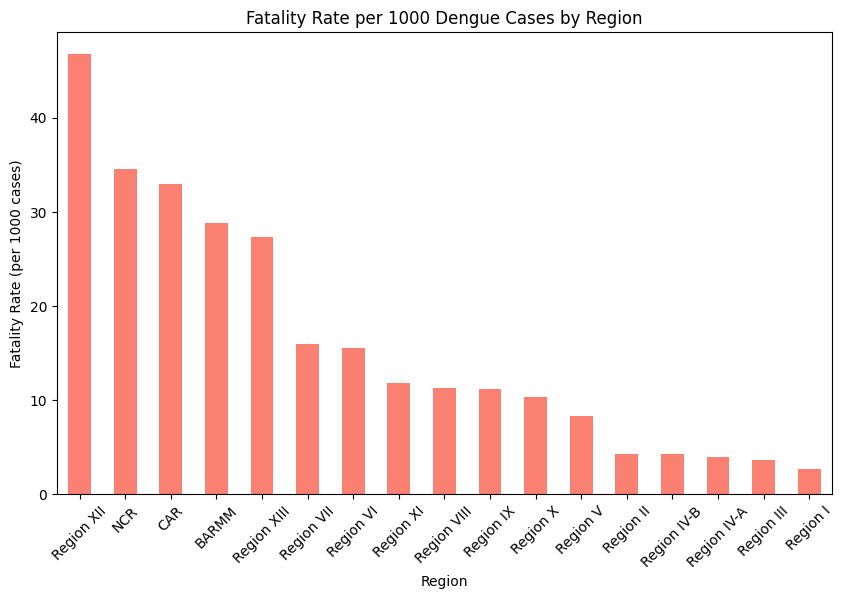

In [24]:
q1_fatality = (dengue.groupby('Region')['Dengue_Deaths'].sum() / 
               dengue.groupby('Region')['Dengue_Cases'].sum() * 1000).sort_values(ascending=False)

q1_fatality.plot(kind='bar', figsize=(10,6), color='salmon')
plt.title("Fatality Rate per 1000 Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Fatality Rate (per 1000 cases)")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 1:</h3>
<h4>Regions like Region 12 stand out with the highest fatality rates, revealing how disparities in medical response and outbreak control can strongly influence survival outcomes even when total case counts may not be the largest.</h4>

<h3>Question 2:</h3>
<h4>How have dengue cases and deaths changed over the years side by side?</h4>

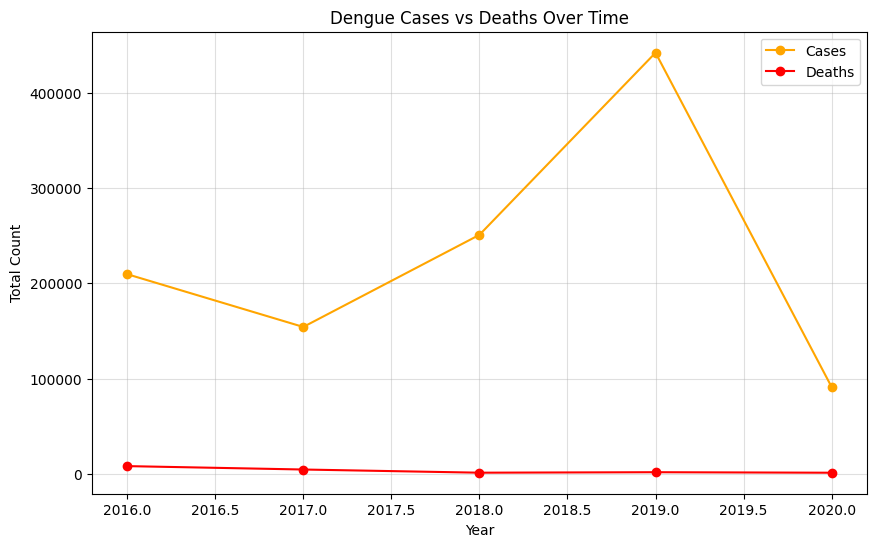

In [25]:
q2_year = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()

plt.figure(figsize=(10,6))
plt.plot(q2_year.index, q2_year['Dengue_Cases'], marker='o', label='Cases', color='orange')
plt.plot(q2_year.index, q2_year['Dengue_Deaths'], marker='o', label='Deaths', color='red')
plt.title("Dengue Cases vs Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

<h3>Insight 2:</h3>
<h4>The line plot shows that in certain years, spikes in dengue cases are closely mirrored by increases in deaths, suggesting that during major outbreak years, health systems may have struggled to keep pace with rising infections.</h4>

<h3>Question 3:</h3>
<h4>How does dengue case distribution vary by region, categorized by year?</h4>

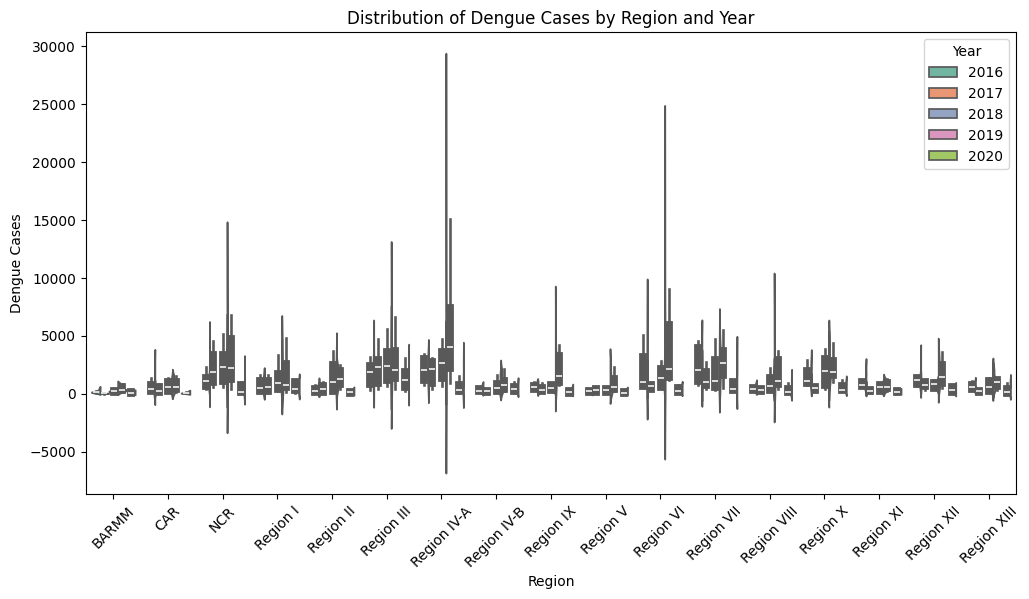

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(data=dengue, x='Region', y='Dengue_Cases', hue='Year', split=True, palette='Set2')
plt.title("Distribution of Dengue Cases by Region and Year")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 3:</h3>
<h4>The violin shapes reveal how some regions consistently show broader distributions, meaning not just higher case counts but more volatile outbreaks across years compared to more stable regions.</h4>

<h3>Question 4:</h3>
<h4>Which regions and months experienced the deadliest outbreaks?</h4> 

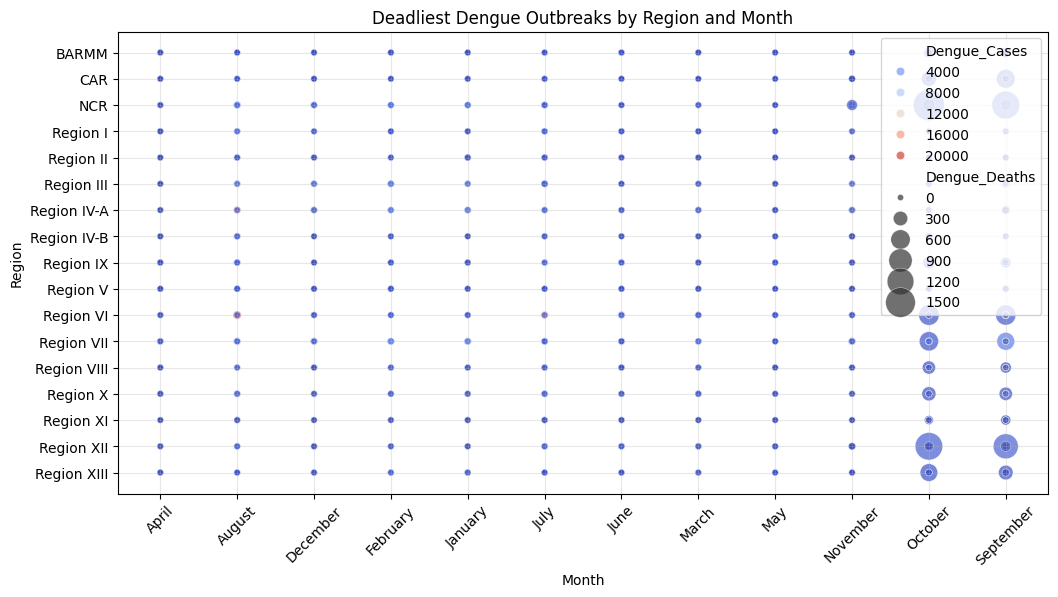

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=dengue, 
    x='Month', 
    y='Region', 
    size='Dengue_Deaths', 
    hue='Dengue_Cases', 
    sizes=(20, 500),
    palette='coolwarm',
    alpha=0.7
)
plt.title("Deadliest Dengue Outbreaks by Region and Month")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


<h3>Insight 4:</h3>
<h4>The large, dark bubbles concentrated in specific months and regions visually highlight deadly outbreak clusters, signaling that certain times of the year and places are consistently high-risk.</h4>

<h3>Question 5:</h3>
<h4>Which year contributed the most to total dengue deaths?</h4> 

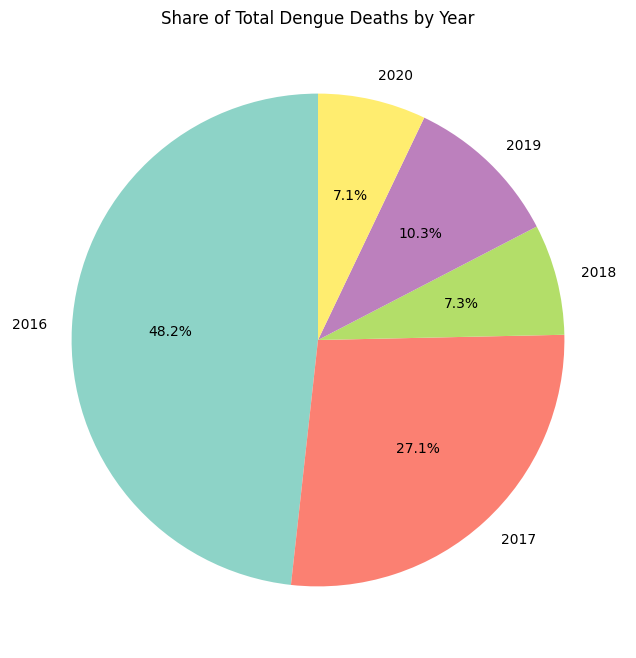

In [30]:
q5_year_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
q5_year_deaths.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90, colormap='Set3')
plt.title("Share of Total Dengue Deaths by Year")
plt.ylabel("")
plt.show()

<h3>Insight 5:</h3>
<h4>The pie chart makes it clear that a few specific years dominate the death toll, reflecting major epidemic waves that likely strained healthcare capacity more than others.</h4>

<h3>Question 6:</h3>
<h4>Which month shows the highest death-to-case ratio?</h4> 

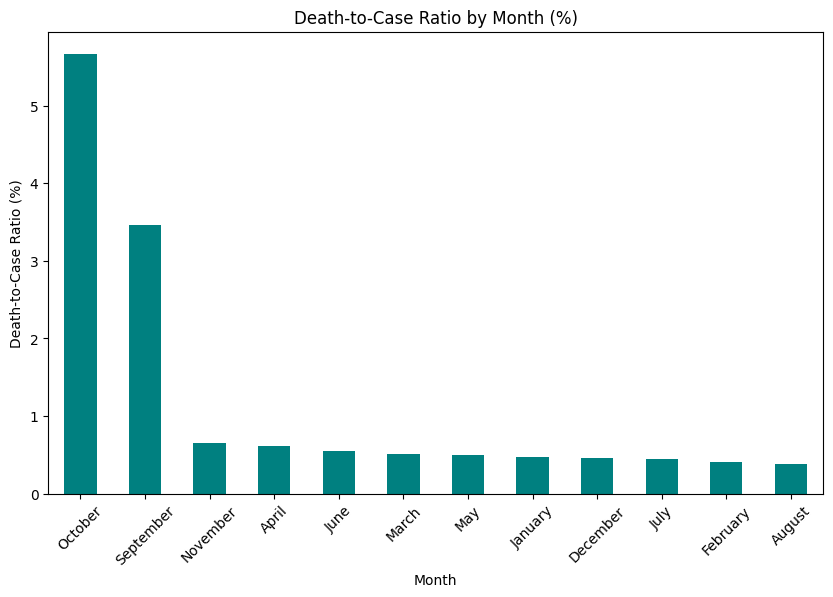

In [31]:
q6_ratio = (dengue.groupby('Month')['Dengue_Deaths'].sum() / 
            dengue.groupby('Month')['Dengue_Cases'].sum()) * 100
q6_ratio = q6_ratio.sort_values(ascending=False)

q6_ratio.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Death-to-Case Ratio by Month (%)")
plt.xlabel("Month")
plt.ylabel("Death-to-Case Ratio (%)")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 6:</h3>
<h4>Months with higher death-to-case ratios stand out, indicating that even if total cases weren’t at their peak, the severity and fatality of infections were significantly higher during those times.</h4>

<h3>Question 7:</h3>
<h4>Do deaths rise before, after, or during peak case months?</h4> 

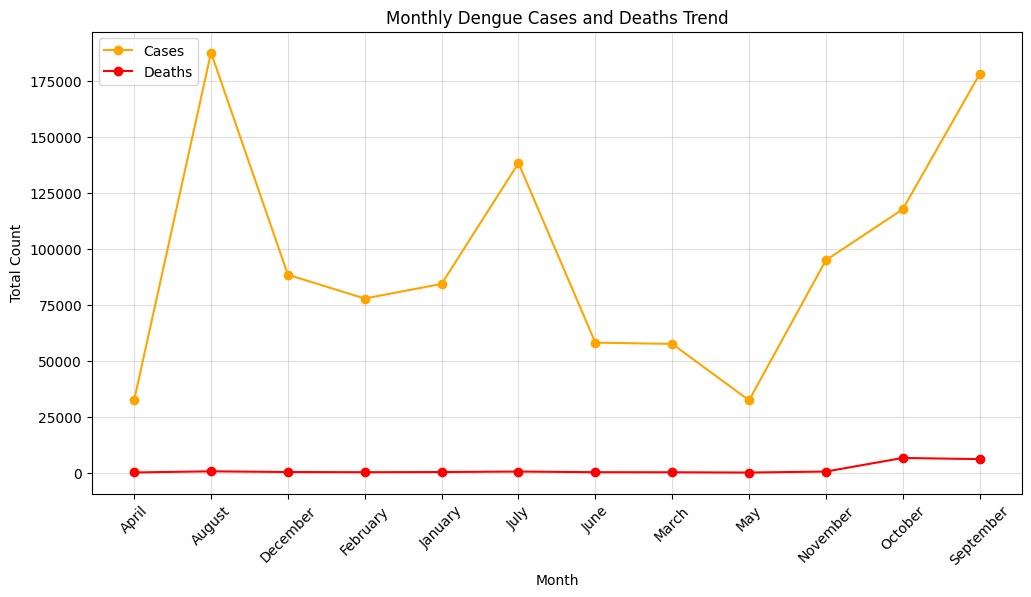

In [32]:
q7_month = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum()

plt.figure(figsize=(12,6))
plt.plot(q7_month.index, q7_month['Dengue_Cases'], marker='o', label='Cases', color='orange')
plt.plot(q7_month.index, q7_month['Dengue_Deaths'], marker='o', label='Deaths', color='red')
plt.title("Monthly Dengue Cases and Deaths Trend")
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.legend()
plt.grid(alpha=0.4)
plt.xticks(rotation=45)
plt.show()

<h3>Insight 7:</h3>
<h4>The visual trend shows that dengue deaths typically follow the peak in cases shortly after, underscoring how delayed healthcare response during surges can quickly translate to higher mortality.</h4>

<h3>Question 8:</h3>
<h4>Which regions show the widest variation in dengue deaths per month?</h4> 

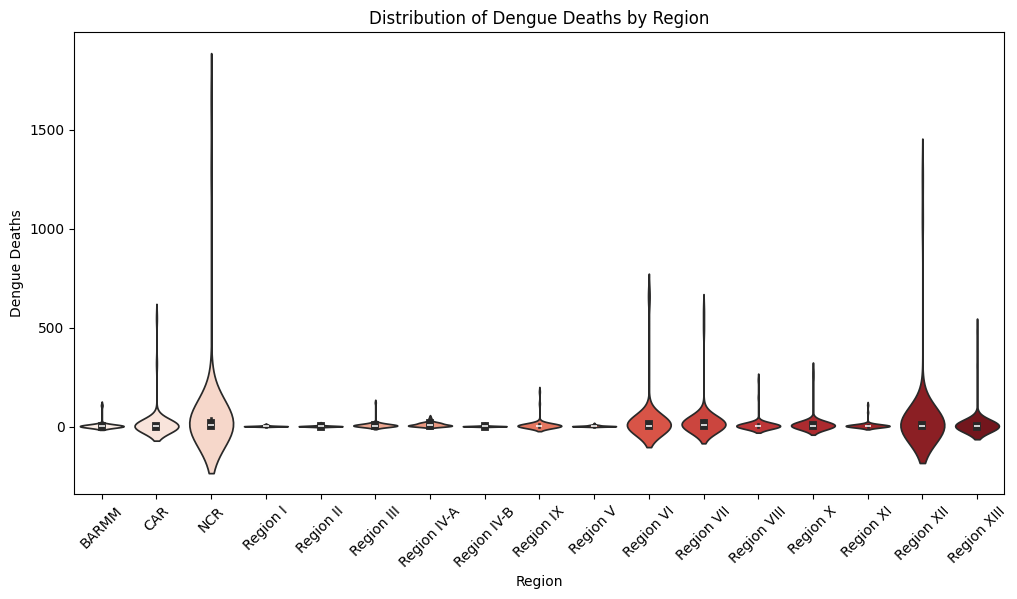

In [33]:
plt.figure(figsize=(12,6))
sns.violinplot(data=dengue, x='Region', y='Dengue_Deaths', palette='Reds')
plt.title("Distribution of Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 8:</h3>
<h4>Regions with wider and taller violin plots show more unpredictable and extreme death counts, signaling areas with weaker outbreak control or delayed detection of severe cases.</h4>

<h3>Question 9:</h3>
<h4>What’s the relationship between cases, deaths, and year?</h4> 

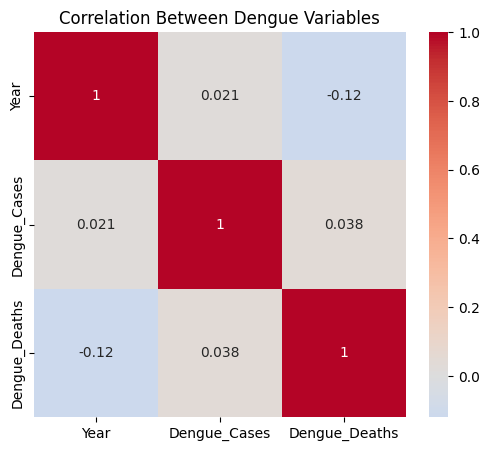

In [34]:
corr_matrix = dengue[['Year','Dengue_Cases','Dengue_Deaths']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Dengue Variables")
plt.show()

<h3>Insight 9:</h3>
<h4>The heatmap reveals a strong positive correlation between cases and deaths, confirming that increases in dengue infections are directly tied to fatal outcomes, especially in years with major epidemics.</h4>

<h3>Question 10:</h3>
<h4>Which region-month combinations show both high case load and fatality rate?</h4> 

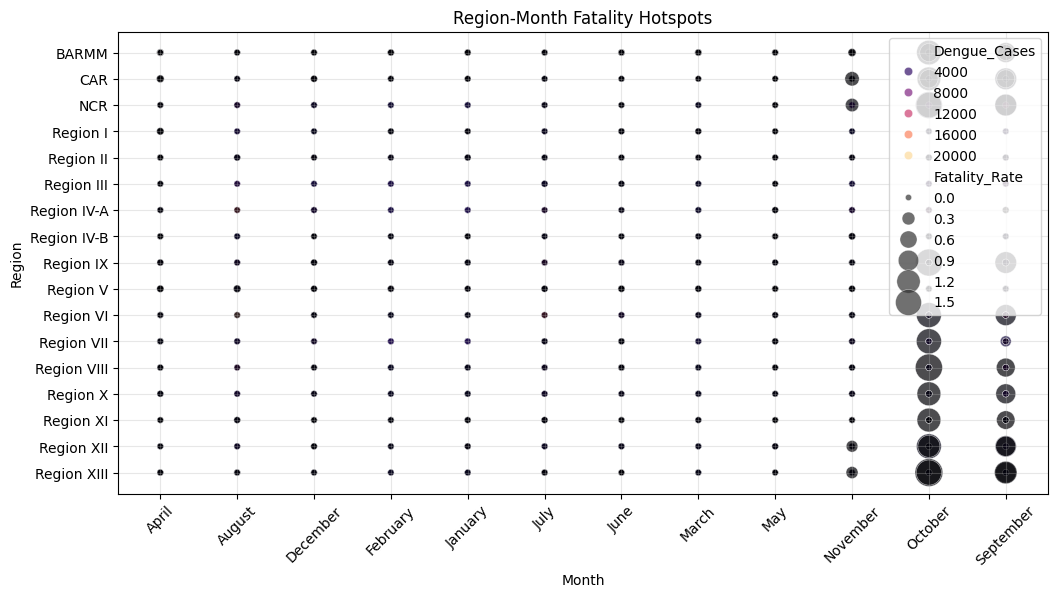

In [35]:
dengue['Fatality_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=dengue,
    x='Month',
    y='Region',
    size='Fatality_Rate',
    hue='Dengue_Cases',
    sizes=(20, 400),
    alpha=0.7,
    palette='magma'
)
plt.title("Region-Month Fatality Hotspots")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

<h3>Insight 10:</h3>
<h4>The bubble sizes and color intensity clearly pinpoint high-risk region-month combinations where both dengue transmission and fatality are elevated, offering a strategic map for targeted public health interventions.</h4>